# Vraag 3

Maak een eigen dataset aan of gebruik een online dataset van een specifiek object. Bouw een AI model dat Anomalies kan detecteren (visueel; dus op foto's). Dit kan bijvoorbeeld gebruikt worden om defecteren in een object vast te stellen. Zorg ervoor dat dit model live gebruikt kan worden (gebruik je webcam,...)

In [2]:
import numpy as np
import cv2
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn import svm
from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler

In [ ]:
! git clone https://github.com/GijsJackersPXL/Smart_systems_Eindoefening.git

fatal: destination path 'Smart_systems_Eindoefening' already exists and is not an empty directory.


In [1]:
# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load data from the directory
data_dir = "/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train"

NameError: ignored

In [ ]:
# Load data with flow_from_directory
data_gen = datagen.flow_from_directory(data_dir,
                                      target_size=(224, 224),
                                      batch_size=10,
                                      class_mode='binary',
                                      shuffle=False)

# Get number of classes
num_classes = len(data_gen.class_indices)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit model on the training data
model.fit(data_gen)

Found 14 images belonging to 1 classes.
2/2 [==============================] - 11s 3s/step - loss: 0.4236 - accuracy: 0.0000e+00


Bij class_mode gebruiken we binary omdat deze maar 1 object moet gebruiken.

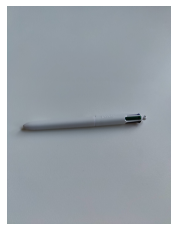

In [ ]:
# Load image

# Enkele PCoC foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train/PSoC/IMG20230103150342.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train/PSoC/IMG20230103150346.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train/PSoC/IMG20230103150353.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train/PSoC/IMG20230103150357.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train/PSoC/IMG20230103150415.jpg")

# Enkele niet PCoC foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Pen/IMG20230103150511.jpg")
image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Pen/IMG20230103150514.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Pen/IMG20230103150551.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

Bij Load image staan enkele bestanden in commentaar zodat deze makkelijker te testen zijn. 

**Opgelet!** Er mag maar één *image = cv2.imread* niet in comment staan.

In [ ]:
def preprocess_image(image, grayscale=False, data_augmentation=False):
  # Resize image
  image = cv2.resize(image, (224, 224))

  # Convert image to grayscale if needed
  if grayscale:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image = np.expand_dims(image, -1)

  # Normalize pixel values
  image = image / 255.0

  # If data augmentation is enabled, randomly apply some transformations
  if data_augmentation:
      image = random_transform(image)

  # Add an extra dimension to the image so that it has shape (1, height, width, channels)
  image = np.expand_dims(image, 0)

  return image

In [ ]:
# Preprocess image
image = preprocess_image(image)

# Run model and get the predictions
predictions = model.predict(image)

# Print
if predictions > 0.7:
  print("Het is een PSOC")
else:
  print("Het is geen PSOC")

1/1 [==============================] - 0s 31ms/step
Het is een PSOC


In [ ]:
print(predictions)

[[1.]]
